##Introduction to Applications of Quantum Computing to Quantum Chemistry

###Exercise (1)
To solve the exercise, implement the following Hamiltonian in a function `hamiltonian()`, given the number of qubits `n_qubits` as argument:
$$
H = \frac{1}{3}\sum_{i<j}X_iX_j - \sum_{i=0}{Z_i}
$$

Then, create a function `circuit()`, given the `n_qubits` as an argument, that applies the Hadamard gate to each wire and calculates the expected value of the defined Hamiltonian. As default, all initialized qubits in pennylane start in the state of |0>.

In [17]:
!pip install pennylane

In [8]:
# Import the libraries
import pennylane as qml

In [9]:
# Define the Hamiltonian, given the number of qubits (n_qubits)
def hamiltonian(n_qubits):

    result_X = 0
    result_Z = 0

    for i in range(n_qubits):

        # Summing the X terms
        for j in range(i):
            result_X += qml.PauliX(i)@qml.PauliX(j)

        # Summing the Z terms
        result_Z += qml.PauliZ(i)

    # Multiplying the X term by the leading constant
    result_X *= 1/3

    return result_X - result_Z

0.3333333333333331


(<Figure size 400x300 with 1 Axes>, <Axes: >)

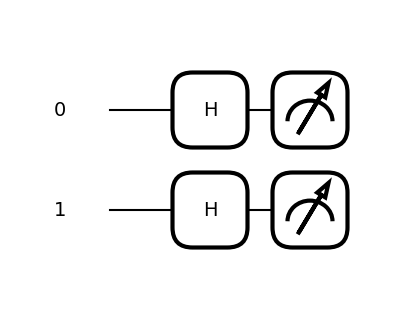

In [16]:
# Choose the input number of qubits
n_qubits = 2

# Create the device
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def circuit(n_qubits):

    #Operate Hadamard in each qubit(wire)
    qml.broadcast(unitary=qml.Hadamard, pattern="single", wires=dev.wires)

    # Get the expected value of the hamiltonian of n qubits

    return qml.expval(hamiltonian(n_qubits))

# Print the result
print(circuit(n_qubits))

# Draw the circuit
qml.drawer.use_style("black_white")
qml.draw_mpl(circuit)(n_qubits)